In [ ]:
###MDTraj

In [1]:
import mdtraj as md
import seaborn as sns 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
NAME_resid_pair = { #"94THR-349LYS":"94THR-349LYS",  
                    #"94THR-350ASP":"94THR-350ASP", 
                    #"94THR-350ASP-349LYS":"94THR-350ASP-349LYS", 
                    #"168ASP-32ARG":"168ASP-32ARG",
                    #"246TYR-156ARG":"246TYR-156ARG",
                    #"330TYR-156ARG":"330TYR-156ARG",
                    #"336ASN-349LYS":"336ASN-349LYS",
                    #"336ASN-350ASP":"336ASN-350ASP",
                    #"336ASN-350ASP-349LYS":"336ASN-350ASP-349LYS"
                    "AT2C2":"AT2C2"


                    }
dflist = []
dflist1 = []
dflist2 = []
dflist3 = []
dflist4 = []
dflist5 = []
dflist6 = []
def rolling_window(df, m):
    arr = []
    for i in range(len(df)-m+1):
        df0 = df.iloc[i:i+m].copy()
        df0["Time"] = np.array(df0["Time"]).mean()
        arr.append(df0)
    return(pd.concat(arr))

m = 10

In [ ]:
print(len(df1))

In [ ]:
df1.columns

In [ ]:
for FILENAME, TITLENAME in NAME_resid_pair.items():
    for i_traj in range(5):
        #x,y = np.loadtxt("Output_MinDist_%s_%s.xvg" %(FILENAME,i_traj),comments=["@", "#"],unpack=True)
        traj = md.load("step7_filtered_skip10_fitted_%s_Set_0_0_%s.xtc"%(FILENAME,i_traj),top="step5_input_Set_0_0_0.pdb",stride=10)
        print("Processing " + FILENAME + "_" + str(i_traj)+".xtc")
        print("How many atoms? %s" %traj.n_atoms)
        print("How many residues? %s" %traj.n_residues)
        #h1 = np.array([[0, 61]], dtype=np.int32)
        #d1 = md.compute_contacts(traj, contacts=h1, scheme="closest-heavy",ignore_nonprotein=True, periodic=True, soft_min=False)
        #print(type(d1),len(d1))
        #d1 = np.array(d1[0]).flatten()[:,None]
        #print(type(d1),d1.shape)
        #print(d1)
        topology = md.load("step5_input_Set_0_0_0.pdb").topology
        ind_1 = topology.select("resid 147 and name NH1")
        print("ind_1", ind_1)
        ind_2 = topology.select("resid 147 and name NH2")
        print("ind_2", ind_2)
        ind_3 = topology.select("resid 244 and name OD1")
        print("ind_3", ind_3)
        ind_4 = topology.select("resid 244 and name OD2")
        print("ind_4", ind_4)
        ind_5 = topology.select("resid 262 and name OD1")
        print("ind_5", ind_5)
        ind_6 = topology.select("resid 262 and name OD2")
        print("ind_6", ind_6)
        ind_7 = topology.select("resid 169 and name OH")
        print("ind_7", ind_7)
        ind_8 = topology.select("resid 162 and name N")
        print("ind_8", ind_8)
        ind_9 = topology.select("resid 307 and name NH2")
        print("ind_9", ind_9)
        ind_10 = topology.select("resid 307 and name NH1")
        print("ind_10", ind_10)
        ind_11 = topology.select("resid 309 and name OH")
        print("ind_11", ind_11)
        ind_12 = topology.select("resid 309 and name N")
        print("ind_12", ind_12)
        ind_13 = topology.select("resid 309 and name O")
        print("ind_13", ind_13)
        ind_14 = topology.select("resid 310 and name O")
        print("ind_14", ind_14)
        ind_15 = topology.select("resid 310 and name OXT")
        print("ind_15", ind_15)
        
        h2 = np.array([[2433, 5106],[2433,5107],[2436,5106],[2436,5107]], dtype=np.int32)
        d2 = md.compute_distances(traj, h2, periodic=True)
        #print(type(d2),d2.shape)
        #d2 = np.array(d2[0])
        d2 = np.min(d2,axis=1)
        d2 = np.array(d2).flatten()[:,None]
        print(type(d2),d2.shape)

        h3 = np.array([[2657, 5087]], dtype=np.int32)
        d3 = md.compute_distances(traj, h3, periodic=True)
        d3 = np.min(d3,axis=1)
        d3 = np.array(d3).flatten()[:,None]
        print(type(d3),d3.shape)

        h4 = np.array([[2782, 5067]], dtype=np.int32)
        d4 = md.compute_distances(traj, h4, periodic=True)
        d4 = np.min(d4,axis=1)
        d4 = np.array(d4).flatten()[:,None]
        print(type(d4),d4.shape)

        h5 = np.array([[4026, 5046],[4026,5043],[4027,5046],[4027,5043]], dtype=np.int32)
        d5 = md.compute_distances(traj, h5, periodic=True)
        d5 = np.min(d5,axis=1)
        d5 = np.array(d5).flatten()[:,None]
        print(type(d5),d5.shape)

        h6 = np.array([[4290, 5046],[4290,5043],[4291,5046],[4291,5043]], dtype=np.int32)
        d6 = md.compute_distances(traj, h6, periodic=True)
        d6 = np.min(d6,axis=1)
        d6 = np.array(d6).flatten()[:,None]
        print(type(d6),d6.shape)

        df2 = pd.DataFrame.from_records(d2, columns=['Distance']) 
        print(df2)
        df2["Time"] = list(range(df2.shape[0]))
        df2.columns = ["Distance", "Time"]
        df2["Time"] = df2["Time"].apply(int)
        df2 = rolling_window(df2, m)
        df2["Content"] = TITLENAME
        df2["Trajectory"] = "%s" %(i_traj)
        dflist2.append(df2)

        df3 = pd.DataFrame.from_records(d3, columns=['Distance']) 
        print(df3)
        df3["Time"] = list(range(df3.shape[0]))
        df3.columns = ["Distance", "Time"]
        df3["Time"] = df3["Time"].apply(int)
        df3 = rolling_window(df3, m)
        df3["Content"] = TITLENAME
        df3["Trajectory"] = "%s" %(i_traj)
        dflist3.append(df3)

        df4 = pd.DataFrame.from_records(d4, columns=['Distance']) 
        print(df4)
        df4["Time"] = list(range(df4.shape[0]))
        df4.columns = ["Distance", "Time"]
        df4["Time"] = df4["Time"].apply(int)
        df4 = rolling_window(df4, m)
        df4["Content"] = TITLENAME
        df4["Trajectory"] = "%s" %(i_traj)
        dflist4.append(df4)

        df5 = pd.DataFrame.from_records(d5, columns=['Distance']) 
        print(df5)
        df5["Time"] = list(range(df5.shape[0]))
        df5.columns = ["Distance", "Time"]
        df5["Time"] = df5["Time"].apply(int)
        df5 = rolling_window(df5, m)
        df5["Content"] = TITLENAME
        df5["Trajectory"] = "%s" %(i_traj)
        dflist5.append(df4)

        df6 = pd.DataFrame.from_records(d6, columns=['Distance']) 
        print(df6)
        df6["Time"] = list(range(df6.shape[0]))
        df6.columns = ["Distance", "Time"]
        df6["Time"] = df6["Time"].apply(int)
        df6 = rolling_window(df6, m)
        df6["Content"] = TITLENAME
        df6["Trajectory"] = "%s" %(i_traj)
        dflist6.append(df6)
#m = 0
#for m in range(traj.n_residues):
    #print(m, topology.residue(m))
#    if (m==167):
        #print(topology.residue(m))
        #break
#       m+1
###


print("Processing Done!")
df2 = pd.concat(dflist2, ignore_index = True)
df2["Distance"] = df2["Distance"]*10
df2["Time"] = df2["Time"]

print("Processing Done!")
df3 = pd.concat(dflist3, ignore_index = True)
df3["Distance"] = df3["Distance"]*10
df3["Time"] = df3["Time"]

print("Processing Done!")
df4 = pd.concat(dflist4, ignore_index = True)
df4["Distance"] = df4["Distance"]*10
df4["Time"] = df4["Time"]

print("Processing Done!")
df5 = pd.concat(dflist5, ignore_index = True)
df5["Distance"] = df5["Distance"]*10
df5["Time"] = df5["Time"]

print("Processing Done!")
df6 = pd.concat(dflist6, ignore_index = True)
df6["Distance"] = df6["Distance"]*10
df6["Time"] = df6["Time"]

In [ ]:
print(table.where(table["resSeq"]==29))

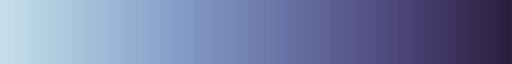

In [ ]:

sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

Plotting AT2C2 now


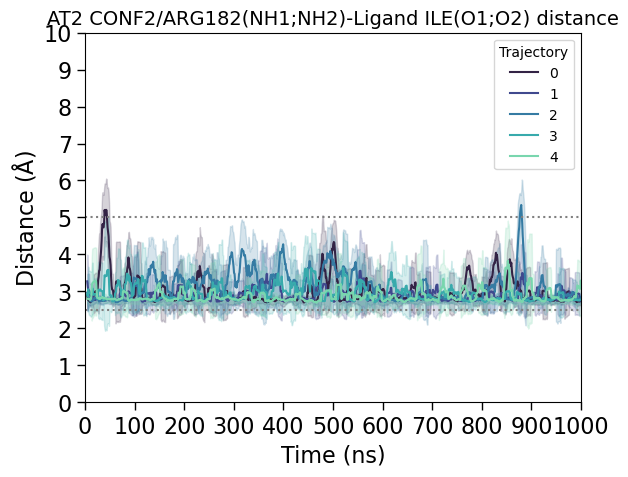

<Figure size 3000x3000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
fig, ax = plt.subplots()
#pal = sns.color_palette("flare", as_cmap=True)

#sequential_colors = sns.color_palette("RdPu", 10)
#sns.palplot(palette)
print("Plotting " + TITLENAME + " now")

plot = sns.lineplot(x="Time", y="Distance", data=df2, hue="Trajectory", ax=ax, 
    err_style = "band", 
    errorbar = ("sd", 1),
    palette = "mako",
        #legend=False,
        #palette="tab20",# {"Y330(OH)-R156(NH1,NH2)":"orangered","Y246(OH)-R156(NH1,NH2)":"chocolate","N336(ND2)-K349(O)":"deepskyblue","N336(ND2)-D350(O)":"darkcyan","2.5 ($\AA$)":'grey',"5.0 ($\AA$)":'grey'},
    linewidth=1.5)

axes = plot.axes
axes.set_ylim(0,10)
#axes.set_yticks(np.linspace(0,16,num=10))
axes.set_yticks(range(0,11,1))
axes.set_xlim(0,1000)
    #ax = sns.pointplot(x,y )
axes.set_xticks(range(0,1050,100))
    #fontsize = 15
    #sns.set(font_scale=0.1) 
    #sns.set_theme(style="white")
    #sns.set_palette("husl")
plot.set_xlabel( "Time (ns)",fontsize=16)
plot.set_ylabel( "Distance ($\mathrm{\AA}$)",fontsize=16)
plot.set_title( "AT2 CONF2/ARG182(NH1;NH2)-Ligand ILE(O1;O2) distance", fontsize=14)
plot.legend(title='Trajectory', fontsize=10,loc='upper right')
    
plot.axhline(y=2.5, color="grey", linestyle=":")
plot.axhline(y=5.0, color="grey", linestyle=":")
plot.tick_params(direction='out', length=6, width=1, colors='black',
               grid_color='black', grid_alpha=1.0, labelsize = 16)
    #plot.setp(plot.get_legend().get_title(), fontsize='20') 
sns.plotting_context({'font.size': 16.0})
    #plot.axes_style("darkgrid")
    #plot.set_theme(style="ticks")
    #fig = plot.figure(figsize=(4,5))
    #fig = plot.get_figure()
plt.figure(figsize=(30,30))
    
fig.savefig("1.png" , bbox_inches="tight", dpi=700)
plt.show()
plt.clf()

Plotting AT2C2 now


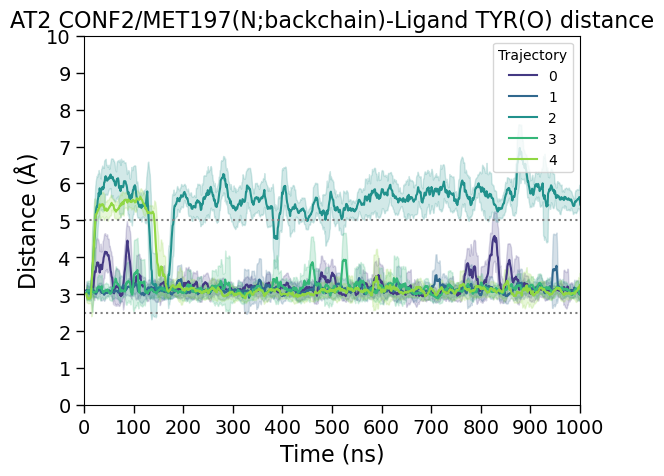

<Figure size 3000x3000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [22]:
fig, ax = plt.subplots()
#sequential_colors = sns.color_palette("RdPu", 10)
#sns.palplot(palette)
print("Plotting " + TITLENAME + " now")

plot = sns.lineplot(x="Time", y="Distance", data=df3, hue="Trajectory", ax=ax, 
    err_style = "band", 
    errorbar = ("sd", 1),
    palette = "viridis",
        #legend=False,
        #palette="tab20",# {"Y330(OH)-R156(NH1,NH2)":"orangered","Y246(OH)-R156(NH1,NH2)":"chocolate","N336(ND2)-K349(O)":"deepskyblue","N336(ND2)-D350(O)":"darkcyan","2.5 ($\AA$)":'grey',"5.0 ($\AA$)":'grey'},
    linewidth=1.5)

axes = plot.axes
axes.set_ylim(0,10)
#axes.set_yticks(np.linspace(0,16,num=10))
axes.set_yticks(range(0,11,1))
axes.set_xlim(0,1000)
    #ax = sns.pointplot(x,y )
axes.set_xticks(range(0,1050,100))
    #fontsize = 15
    #sns.set(font_scale=0.1) 
    #sns.set_theme(style="white")
    #sns.set_palette("husl")
plot.set_xlabel( "Time (ns)",fontsize=16)
plot.set_ylabel( "Distance ($\mathrm{\AA}$)",fontsize=16)
plot.set_title( "AT2 CONF2/MET197(N;backchain)-Ligand TYR(O) distance" , fontsize=16)
plot.legend(title='Trajectory', fontsize=10,loc='upper right')
    
plot.axhline(y=2.5, color="grey", linestyle=":")
plot.axhline(y=5.0, color="grey", linestyle=":")
plot.tick_params(direction='out', length=6, width=1, colors='black',
               grid_color='black', grid_alpha=1.0, labelsize = 14)
    #plot.setp(plot.get_legend().get_title(), fontsize='20') 
sns.plotting_context({'font.size': 16.0})
    #plot.axes_style("darkgrid")
    #plot.set_theme(style="ticks")
    #fig = plot.figure(figsize=(4,5))
    #fig = plot.get_figure()
plt.figure(figsize=(30,30))
    
fig.savefig("2.png" , bbox_inches="tight", dpi=700)
plt.show()
plt.clf()

Plotting AT2C2 now


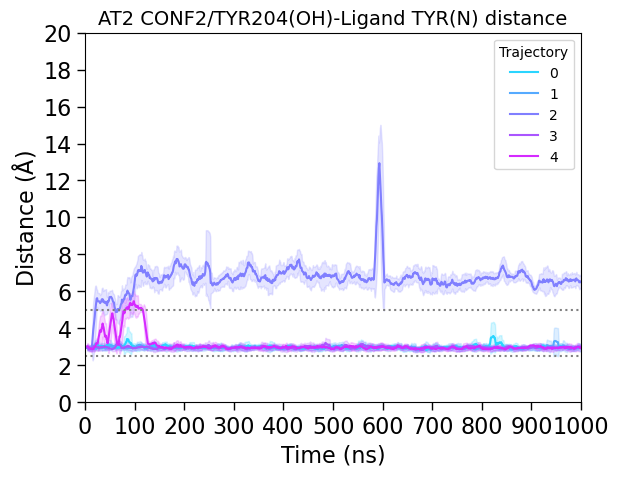

<Figure size 3000x3000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax = plt.subplots()
#sequential_colors = sns.color_palette("RdPu", 10)
#sns.palplot(palette)
print("Plotting " + TITLENAME + " now")

plot = sns.lineplot(x="Time", y="Distance", data=df4, hue="Trajectory", ax=ax, 
    err_style = "band", 
    errorbar = ("sd", 1),
    palette = "cool",
        #legend=False,
        #palette="tab20",# {"Y330(OH)-R156(NH1,NH2)":"orangered","Y246(OH)-R156(NH1,NH2)":"chocolate","N336(ND2)-K349(O)":"deepskyblue","N336(ND2)-D350(O)":"darkcyan","2.5 ($\AA$)":'grey',"5.0 ($\AA$)":'grey'},
    linewidth=1.5)

axes = plot.axes
axes.set_ylim(0,20)
#axes.set_yticks(np.linspace(0,16,num=10))
axes.set_yticks(range(0,21,2))
axes.set_xlim(0,1000)
    #ax = sns.pointplot(x,y )
axes.set_xticks(range(0,1050,100))
    #fontsize = 15
    #sns.set(font_scale=0.1) 
    #sns.set_theme(style="white")
    #sns.set_palette("husl")
plot.set_xlabel( "Time (ns)",fontsize=16)
plot.set_ylabel( "Distance ($\mathrm{\AA}$)",fontsize=16)
plot.set_title( "AT2 CONF2/TYR204(OH)-Ligand TYR(N) distance", fontsize=14)
plot.legend(title='Trajectory', fontsize=10,loc='upper right')
    
plot.axhline(y=2.5, color="grey", linestyle=":")
plot.axhline(y=5.0, color="grey", linestyle=":")
plot.tick_params(direction='out', length=6, width=1, colors='black',
               grid_color='black', grid_alpha=1.0, labelsize = 16)
    #plot.setp(plot.get_legend().get_title(), fontsize='20') 
sns.plotting_context({'font.size': 16.0})
    #plot.axes_style("darkgrid")
    #plot.set_theme(style="ticks")
    #fig = plot.figure(figsize=(4,5))
    #fig = plot.get_figure()
plt.figure(figsize=(30,30))
    
fig.savefig("3.png" , bbox_inches="tight", dpi=700)
plt.show()
plt.clf()


Plotting AT2C2 now


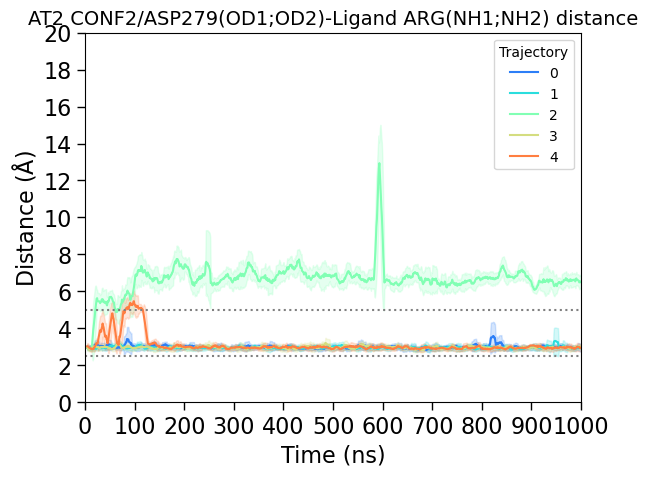

<Figure size 3000x3000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [14]:

fig, ax = plt.subplots()
#sequential_colors = sns.color_palette("RdPu", 10)
#sns.palplot(palette)
print("Plotting " + TITLENAME + " now")

plot = sns.lineplot(x="Time", y="Distance", data=df5, hue="Trajectory", ax=ax, 
    err_style = "band", 
    errorbar = ("sd", 1),
    palette = "rainbow",
        #legend=False,
        #palette="tab20",# {"Y330(OH)-R156(NH1,NH2)":"orangered","Y246(OH)-R156(NH1,NH2)":"chocolate","N336(ND2)-K349(O)":"deepskyblue","N336(ND2)-D350(O)":"darkcyan","2.5 ($\AA$)":'grey',"5.0 ($\AA$)":'grey'},
    linewidth=1.5)

axes = plot.axes
axes.set_ylim(0,20)
#axes.set_yticks(np.linspace(0,16,num=10))
axes.set_yticks(range(0,21,2))
axes.set_xlim(0,1000)
    #ax = sns.pointplot(x,y )
axes.set_xticks(range(0,1050,100))
    #fontsize = 15
    #sns.set(font_scale=0.1) 
    #sns.set_theme(style="white")
    #sns.set_palette("husl")
plot.set_xlabel( "Time (ns)",fontsize=16)
plot.set_ylabel( "Distance ($\mathrm{\AA}$)",fontsize=16)
plot.set_title( "AT2 CONF2/ASP279(OD1;OD2)-Ligand ARG(NH1;NH2) distance", fontsize=14)
plot.legend(title='Trajectory', fontsize=10,loc='upper right')
    
plot.axhline(y=2.5, color="grey", linestyle=":")
plot.axhline(y=5.0, color="grey", linestyle=":")
plot.tick_params(direction='out', length=6, width=1, colors='black',
               grid_color='black', grid_alpha=1.0, labelsize = 16)
    #plot.setp(plot.get_legend().get_title(), fontsize='20') 
sns.plotting_context({'font.size': 16.0})
    #plot.axes_style("darkgrid")
    #plot.set_theme(style="ticks")
    #fig = plot.figure(figsize=(4,5))
    #fig = plot.get_figure()
plt.figure(figsize=(30,30))
    
fig.savefig("4.png" , bbox_inches="tight", dpi=700)
plt.show()
plt.clf()


Plotting AT2C2 now


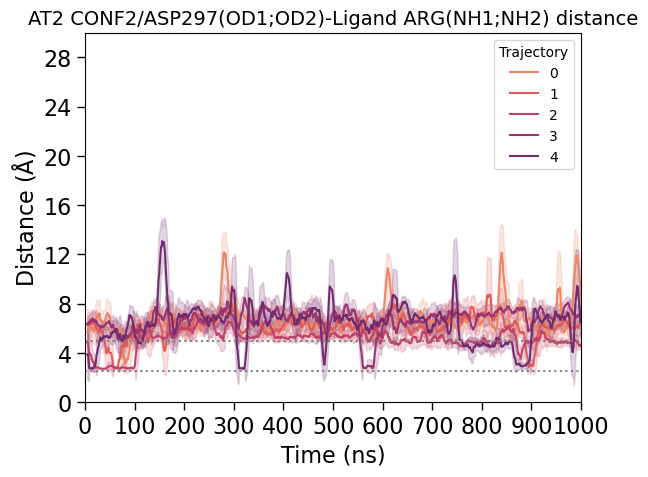

<Figure size 3000x3000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:

fig, ax = plt.subplots()
#sequential_colors = sns.color_palette("RdPu", 10)
#sns.palplot(palette)
print("Plotting " + TITLENAME + " now")

plot = sns.lineplot(x="Time", y="Distance", data=df6, hue="Trajectory", ax=ax, 
    err_style = "band", 
    errorbar = ("sd", 1),
    palette = "flare",
        #legend=False,
        #palette="tab20",# {"Y330(OH)-R156(NH1,NH2)":"orangered","Y246(OH)-R156(NH1,NH2)":"chocolate","N336(ND2)-K349(O)":"deepskyblue","N336(ND2)-D350(O)":"darkcyan","2.5 ($\AA$)":'grey',"5.0 ($\AA$)":'grey'},
    linewidth=1.5)

axes = plot.axes
axes.set_ylim(0,30)
#axes.set_yticks(np.linspace(0,16,num=10))
axes.set_yticks(range(0,31,4))
axes.set_xlim(0,1000)
    #ax = sns.pointplot(x,y )
axes.set_xticks(range(0,1050,100))
    #fontsize = 15
    #sns.set(font_scale=0.1) 
    #sns.set_theme(style="white")
    #sns.set_palette("husl")
plot.set_xlabel( "Time (ns)",fontsize=16)
plot.set_ylabel( "Distance ($\mathrm{\AA}$)",fontsize=16)
plot.set_title( "AT2 CONF2/ASP297(OD1;OD2)-Ligand ARG(NH1;NH2) distance", fontsize=14)
plot.legend(title='Trajectory', fontsize=10,loc='upper right')
    
plot.axhline(y=2.5, color="grey", linestyle=":")
plot.axhline(y=5.0, color="grey", linestyle=":")
plot.tick_params(direction='out', length=6, width=1, colors='black',
               grid_color='black', grid_alpha=1.0, labelsize = 16)
    #plot.setp(plot.get_legend().get_title(), fontsize='20') 
sns.plotting_context({'font.size': 16.0})
    #plot.axes_style("darkgrid")
    #plot.set_theme(style="ticks")
    #fig = plot.figure(figsize=(4,5))
    #fig = plot.get_figure()
plt.figure(figsize=(30,30))
    
fig.savefig("5.png" , bbox_inches="tight", dpi=700)
plt.show()
plt.clf()


In [ ]:
#Hist

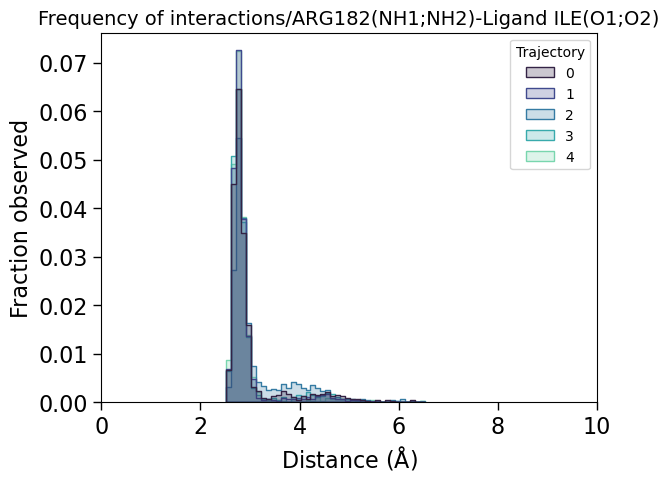

<Figure size 640x480 with 0 Axes>

In [16]:
    #sns.set_palette("husl")
hist = sns.histplot(
    df2, x="Distance", 
    binwidth=0.1,
    element="step",
    stat="proportion",
    palette = "mako",
    #thresh=1,
        #palette = "gnuplot",
        #palette = "cool",
        #palette = "inferno",
    #fill=False,
    hue="Trajectory"
    )
    #axes = plot.axes
hist.tick_params(direction='out', length=6, width=1, colors='black',
               grid_color='black', grid_alpha=1.0, labelsize = 16)
#hist.set(yticklabels=[])
#hist.set(ylabel=None)
#hist.tick_params(left=False)
    #axes.set_ylim(0,15)
hist.set_ylabel( "Fraction observed",fontsize=16)
hist.set_xlabel( "Distance ($\mathrm{\AA}$)",fontsize=16)
hist.set_title( "Frequency of interactions/ARG182(NH1;NH2)-Ligand ILE(O1;O2)",fontsize=14)
hist.set_xlim(xmin=0.0, xmax=10.0)
hist.set_xticks(range(0,11,2))
    
    #ax = sns.pointplot(x,y )
    #axes.set_xticks(range(0,750,100))
fig = hist.get_figure()
    #hist.legend(title='Trajectory', fontsize=10,loc='upper right')
    #hist.tick_params(direction='in', length=6, width=1, colors='black',
               #grid_color='black', grid_alpha=1.0, labelsize = 16)
    #plot.setp(plot.get_legend().get_title(), fontsize='20') 
sns.plotting_context({'font.size': 16.0})
   
fig = hist.get_figure()
fig.savefig("Frequency_1.png", bbox_inches="tight", dpi=700)
plt.show()
plt.clf()

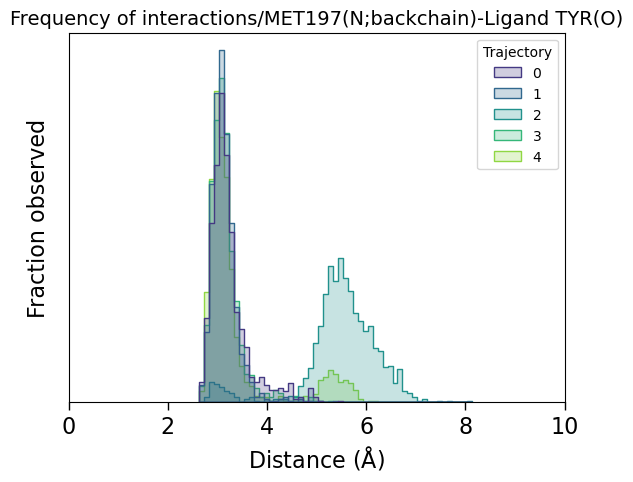

<Figure size 640x480 with 0 Axes>

In [23]:
#sns.set_palette("husl")
hist = sns.histplot(
        df3, x="Distance", 
        binwidth=0.1,
        element="step",
        stat="proportion",
        #palette = "mako",
        palette = "viridis",
        #palette = "cool",
        #palette = "inferno",
        #fill=False,
        hue="Trajectory"
    )
    #axes = plot.axes
hist.tick_params(direction='out', length=6, width=1, colors='black',
               grid_color='black', grid_alpha=1.0, labelsize = 16)
hist.set(yticklabels=[])
hist.set(ylabel=None)
hist.tick_params(left=False)
    #axes.set_ylim(0,15)
hist.set_ylabel( "Fraction observed",fontsize=16)
hist.set_xlabel( "Distance ($\mathrm{\AA}$)",fontsize=16)
hist.set_title( "Frequency of interactions/MET197(N;backchain)-Ligand TYR(O)",fontsize=14)
hist.set_xlim(xmin=0.0, xmax=10.0)
hist.set_xticks(range(0,11,2))
    
    #ax = sns.pointplot(x,y )
    #axes.set_xticks(range(0,750,100))
fig = hist.get_figure()
    #hist.legend(title='Trajectory', fontsize=10,loc='upper right')
    #hist.tick_params(direction='in', length=6, width=1, colors='black',
               #grid_color='black', grid_alpha=1.0, labelsize = 16)
    #plot.setp(plot.get_legend().get_title(), fontsize='20') 
sns.plotting_context({'font.size': 16.0})
   
fig = hist.get_figure()
fig.savefig("Frequency_2.png" , bbox_inches="tight", dpi=700)
plt.show()
plt.clf()

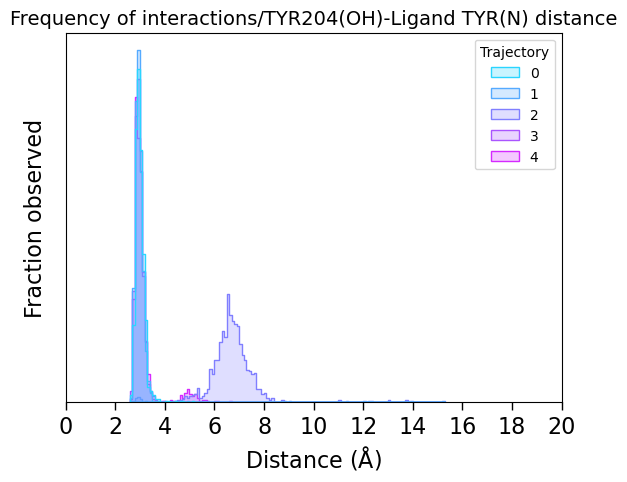

<Figure size 640x480 with 0 Axes>

In [19]:
  #sns.set_palette("husl")
hist = sns.histplot(
        df4, x="Distance", 
        binwidth=0.1,
        element="step",
        stat="proportion",
        #palette = "mako",
        #palette = "gnuplot",
        palette = "cool",
        #palette = "inferno",
        #fill=False,
        hue="Trajectory"
    )
    #axes = plot.axes
hist.tick_params(direction='out', length=6, width=1, colors='black',
               grid_color='black', grid_alpha=1.0, labelsize = 16)
hist.set(yticklabels=[])
hist.set(ylabel=None)
hist.tick_params(left=False)
    #axes.set_ylim(0,15)
hist.set_ylabel( "Fraction observed",fontsize=16)
hist.set_xlabel( "Distance ($\mathrm{\AA}$)",fontsize=16)
hist.set_title( "Frequency of interactions/TYR204(OH)-Ligand TYR(N) distance",fontsize=14)
hist.set_xlim(xmin=0.0, xmax=20.0)
hist.set_xticks(range(0,21,2))
    
    #ax = sns.pointplot(x,y )
    #axes.set_xticks(range(0,750,100))
fig = hist.get_figure()
    #hist.legend(title='Trajectory', fontsize=10,loc='upper right')
    #hist.tick_params(direction='in', length=6, width=1, colors='black',
               #grid_color='black', grid_alpha=1.0, labelsize = 16)
    #plot.setp(plot.get_legend().get_title(), fontsize='20') 
sns.plotting_context({'font.size': 16.0})
   
fig = hist.get_figure()
fig.savefig("Frequency_3.png" , bbox_inches="tight", dpi=700)
plt.show()
plt.clf()

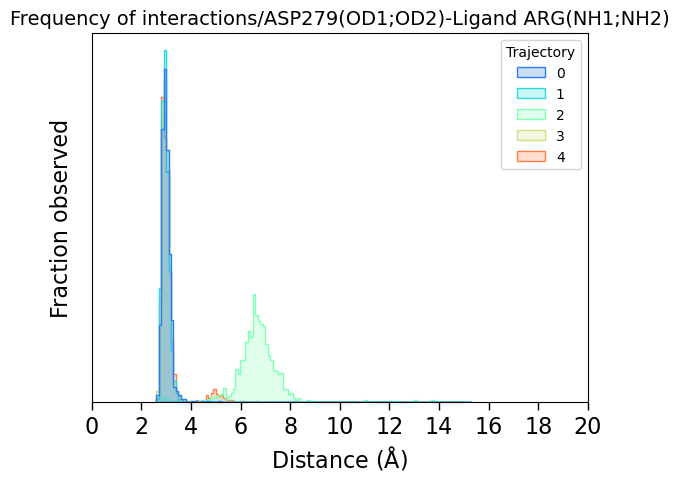

<Figure size 640x480 with 0 Axes>

In [20]:
    #sns.set_palette("husl")
hist = sns.histplot(
        df5, x="Distance", 
        binwidth=0.1,
        element="step",
        stat="proportion",
        #palette = "mako",
        #palette = "gnuplot",
        #palette = "cool",
        palette = "rainbow",
        #fill=False,
        hue="Trajectory"
    )
    #axes = plot.axes
hist.tick_params(direction='out', length=6, width=1, colors='black',
               grid_color='black', grid_alpha=1.0, labelsize = 16)
hist.set(yticklabels=[])
hist.set(ylabel=None)
hist.tick_params(left=False)
    #axes.set_ylim(0,15)
hist.set_ylabel( "Fraction observed",fontsize=16)
hist.set_xlabel( "Distance ($\mathrm{\AA}$)",fontsize=16)
hist.set_title( "Frequency of interactions/ASP279(OD1;OD2)-Ligand ARG(NH1;NH2)",fontsize=14)
hist.set_xlim(xmin=0.0, xmax=20.0)
hist.set_xticks(range(0,21,2))
    
    #ax = sns.pointplot(x,y )
    #axes.set_xticks(range(0,750,100))
fig = hist.get_figure()
    #hist.legend(title='Trajectory', fontsize=10,loc='upper right')
    #hist.tick_params(direction='in', length=6, width=1, colors='black',
               #grid_color='black', grid_alpha=1.0, labelsize = 16)
    #plot.setp(plot.get_legend().get_title(), fontsize='20') 
sns.plotting_context({'font.size': 16.0})
   
fig = hist.get_figure()
fig.savefig("Frequency_4.png" , bbox_inches="tight", dpi=700)
plt.show()
plt.clf()

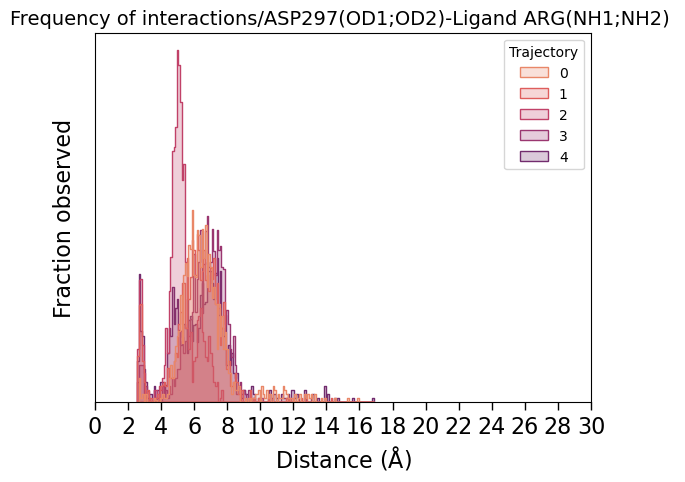

<Figure size 640x480 with 0 Axes>

In [21]:
    #sns.set_palette("husl")
hist = sns.histplot(
        df6, x="Distance", 
        binwidth=0.1,
        element="step",
        stat="proportion",
        #palette = "mako",
        #palette = "gnuplot",
        #palette = "cool",
        palette = "flare",
        #fill=False,
        hue="Trajectory"
    )
    #axes = plot.axes
hist.tick_params(direction='out', length=6, width=1, colors='black',
               grid_color='black', grid_alpha=1.0, labelsize = 16)
hist.set(yticklabels=[])
hist.set(ylabel=None)
hist.tick_params(left=False)
    #axes.set_ylim(0,15)
hist.set_ylabel( "Fraction observed",fontsize=16)
hist.set_xlabel( "Distance ($\mathrm{\AA}$)",fontsize=16)
hist.set_title( "Frequency of interactions/ASP297(OD1;OD2)-Ligand ARG(NH1;NH2) ",fontsize=14)
hist.set_xlim(xmin=0.0, xmax=30.0)
hist.set_xticks(range(0,31,2))
    
    #ax = sns.pointplot(x,y )
    #axes.set_xticks(range(0,750,100))
fig = hist.get_figure()
    #hist.legend(title='Trajectory', fontsize=10,loc='upper right')
    #hist.tick_params(direction='in', length=6, width=1, colors='black',
               #grid_color='black', grid_alpha=1.0, labelsize = 16)
    #plot.setp(plot.get_legend().get_title(), fontsize='20') 
sns.plotting_context({'font.size': 16.0})
   
fig = hist.get_figure()
fig.savefig("Frequency_5.png" , bbox_inches="tight", dpi=700)
plt.show()
plt.clf()